## Daniel Lupercio HW3

### 8. We will now perform cross-validation on a simulated data set.

### (a) Generate a simulated data set

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut  # To use cross-validation in (c); only available after scikit v0.17.1
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  # To fit models using least squares
from sklearn.pipeline import Pipeline #used for part c
import warnings

In [2]:
np.random.seed(1)
mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(size = 100)
y = np.random.normal(size = 100)
epsilon = np.random.normal(size = 100)

In [3]:
y = x - 2 * x**2 + epsilon

### In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.

n is the number of observations, where n = 100. p is the number of parameters or variables used, here we are using two parameters.

$$
Y = X-2X^2+ \epsilon
$$

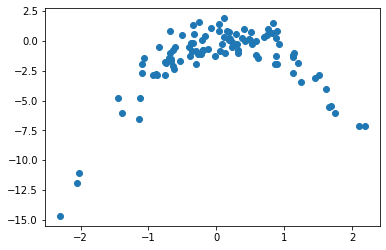

In [4]:
plt.scatter(x,y);

We see a quadration function. The relative maximum of this function is right above 0. The domain of this function ranges from {-4,3}.

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

$$
i. Y = \beta_0 + \beta_1X + \epsilon \\
ii. Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon \\
iii. Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon \\
iv. Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon
$$

### Note you may find it helpful to use the $data.frame()$ function to create a single data set containing both X and Y. 

In [10]:
np.random.seed(5)

In [11]:
#We will initialize an empty LOOCV object
loo = LeaveOneOut()

We will create a dataframe, making our x and y values easier to handle

In [12]:
df = pd.DataFrame({'x':x, 'y':y})

In [13]:
df.head()

,x,y
0,1.624345,-4.053529
1,-0.611756,-0.536243
2,-0.528172,-1.648408
3,-1.072969,-1.420614
4,0.865408,-1.964405


We will use a pipeline to finish this exercise. Notice that the minimum degree of our equations is 1. Our maximum degree is 4. Using Python syntax, we will need to set the maximum degree = 5, allowing our iterations to work.

In [14]:
warnings.filterwarnings('ignore')
# Initiate variables
min_deg = 1  # Minimum degree of the polynomial equations considered
max_deg = 5  # Maximum degree of the polynomial equations considered
scores = [] # Will use to concatenate the MSE scores into a list

# Compute mean squared error (MSE) for the different polynomial equations.
for i in range(min_deg, max_deg):
    for train, test in loo.split(df): #LOOCV, expect to return 4 splits, one for each model
        X_train = df['x'][train]
        y_train = df['x'][train]
        X_test = df['x'][test]
        y_test = df['y'][test]
        
        #Create our pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree = i)), 
                    ('linear', LinearRegression())])
        model.fit(X_train[:, np.newaxis], y_train) #increase the column dimension of X_train by 1
        
        # perhaps np.newaxis is deprecated
        
        
        #MSE
        score = mean_squared_error(y_test, model.predict(X_test[:, np.newaxis]))
        scores.append(score)
        
    print("Model %i, (MSE): %f" % (i,np.mean(scores)))
    scores = []

Model 1, (MSE): 9.697357
Model 2, (MSE): 9.697357
Model 3, (MSE): 9.697357
Model 4, (MSE): 9.697357


f) use statsmodels and print the p-values for the significance of the coefficients